# Comparing iPhone and Samunsung J series users

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sklearn

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



I am going to study the differences between Iphone and Samsung J series users. First I will create two different dataframes, one with all the rows from iPhone users and the other one with all the rows of J series users. First I am going to decide which rows should be dropped in case of having NaN values.

<font size="1" color="gray"></font>

In [36]:
#We upload the database
database = pd.read_csv("device_db.csv", sep=",")

If there is no data in "PURCHASED_DEVICE" or "DEVICE_VALUE" we remove those cells. If "DATA_TRAFFIC_MONTH_(1..6)", "VOICE_TRAFFIC_MONTH_(1..6)", "BILLING_MONTH_(1..6)", or "DEVICE_COST_MONTH_(1..6)" have NaN values we will consider them to be 0.
<font size="1" color="white"></font>

In [37]:
#Now i will drop and fill the rows just explained.
data_traffic = [col for col in clear_db.columns if ("DATA_TRAFFIC" in col) ]
voice_traffic = [col for col in clear_db.columns if ("VOICE_TRAFFIC" in col) ]
billing_month = [col for col in clear_db.columns if ("BILLING_MONTH" in col) ]
device_cost = [col for col in clear_db.columns if ("DEVICE_COST" in col) ]
columns_to_clear = data_traffic + voice_traffic + billing_month + device_cost

clear_db = database

for col in database.columns:
    if col in columns_to_clear: 
        clear_db[col] = clear_db[col].fillna(0)

clear_db = clear_db.dropna(subset=['PURCHASED_DEVICE','DEVICE_VALUE'])
database = clear_db

Now that we have cleared the database I want to filter it into two databases. One for J series Samsung users and the other for iPhone users. Using the variable "PURCHASED_DEVICE" I am creating a function in order to transform the categorical value into a numerical one.
<font size="1" color="white"></font>

In [38]:
def extract_brand(device_name):
    # Splitting the string by underscore
    parts = device_name.split('_')
    # Checking if the second part contains "Samsung" or "iPhone"
    if len(parts) > 1:
        if "SAMSUNG" in parts[1]:
            return 1
        elif "APPLE" in parts[1]:
            return 2
        else: return 0

I add a column to the dataframe with the numerical version of "PURCHASED_DEVICE".
<font size="1" color="black"></font>

In [39]:
brand_code = []
for name in database["PURCHASED_DEVICE"]:
    #print(name)
    brand = extract_brand(str(name))
    brand_code.append(brand)
 

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: brand_code, Length: 9690, dtype: int64

If the brand code of the row is 1 we add the row to the samsung users dataframe, and if it has a 2 to the Apple user dataframe.


In [40]:
samsung_users =pd.DataFrame(columns=database.columns)
apple_users =pd.DataFrame(columns=database.columns)
samsung_users = database[database["brand_code"] == 1]
apple_users = database[database["brand_code"] == 2]

Now that we have samsung and apple users are separated we can proceed to compare their data. I will study 2 different topics to compare them between the 2 groups. I will make a device analysis using 'DEVICE_VALUE' and 'DEVICE_COST_MONTH_,  and a Traffic analysis using DATA_TRAFFIC_MONTH_1'. I will compare their distributions and descriptive statistics and make data visualtization.


## Study of the Device value and cost/moth in Samsung J series users vs iPhone users


In [53]:
columns = ["DEVICE_VALUE"] +[col for col in clear_db.columns if ("DEVICE_COST" in col) ]
samsung_users[columns].describe()

,DEVICE_VALUE,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
count,1747.000000,1747.00000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000
mean,1054.468231,13.26166,9.264568,11.769101,10.950177,11.861723,12.009038
std,1006.502981,157.24796,26.494162,65.212590,27.701845,40.618728,29.761351
min,44.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,489.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,609.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.000000,7.00000,9.000000,12.000000,12.000000,12.000000,13.000000
max,6033.000000,6440.00000,366.000000,2466.000000,258.750000,1258.000000,265.370000


<Axes: xlabel='DEVICE_VALUE', ylabel='Count'>

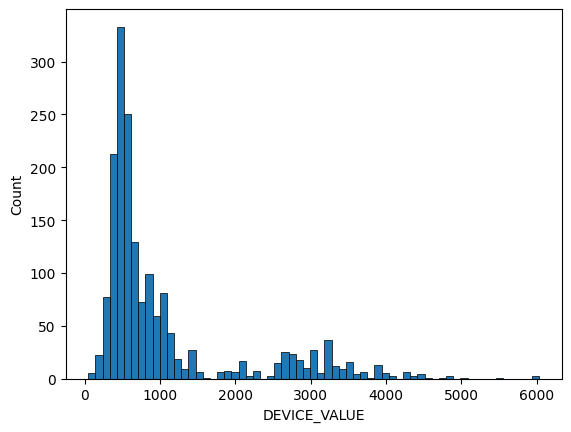

In [54]:
sns.histplot(samsung_users, x = "DEVICE_VALUE", kde = False, alpha = 1, label = " Samsung Device Value")

In [65]:
samsung_users["total_DEVICE_VALUE"] = samsung_users[[col for col in clear_db.columns if ("DEVICE_COST" in col) ]].sum(axis=1)
samsung_users["total_DEVICE_VALUE"].describe()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_17808\2755598131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_users["total_DEVICE_VALUE"] = samsung_users[[col for col in clear_db.columns if ("DEVICE_COST" in col) ]].sum(axis=1)


count    1747.000000
mean       69.116268
std       247.584366
min         0.000000
25%         0.000000
50%         0.000000
75%        72.000000
max      7544.000000
Name: total_DEVICE_VALUE, dtype: float64

In [52]:
columns = ["DEVICE_VALUE"] +[col for col in clear_db.columns if ("DEVICE_COST" in col) ]
apple_users[columns].describe()

,DEVICE_VALUE,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3552.806061,19.276455,20.391788,21.483303,22.835939,24.039455,24.367091
std,1273.911899,48.649999,49.546103,50.604150,52.000999,53.228301,53.505257
min,1305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3245.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4233.000000,7.000000,9.250000,12.000000,12.000000,13.000000,13.000000
max,9057.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000


<Axes: xlabel='DEVICE_VALUE', ylabel='Count'>

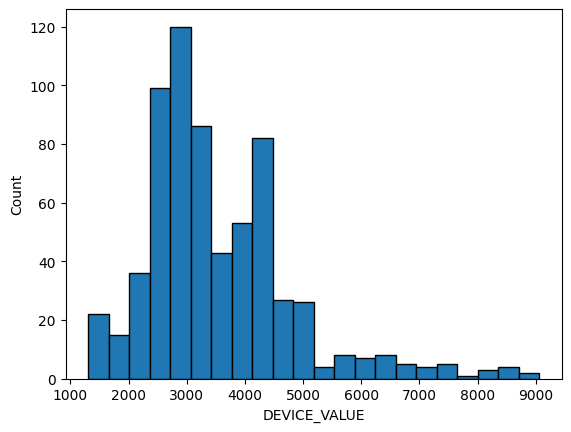

In [55]:
sns.histplot(apple_users, x = "DEVICE_VALUE", kde = False, alpha = 1, label = " Samsung Device Value")

In [66]:
apple_users["total_DEVICE_VALUE"] = apple_users[[col for col in clear_db.columns if ("DEVICE_COST" in col) ]].sum(axis=1)
apple_users["total_DEVICE_VALUE"].describe()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_17808\2983268841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_users["total_DEVICE_VALUE"] = apple_users[[col for col in clear_db.columns if ("DEVICE_COST" in col) ]].sum(axis=1)


count     660.000000
mean      132.394030
std       298.072744
min         0.000000
25%         0.000000
50%         0.000000
75%        72.000000
max      2466.000000
Name: total_DEVICE_VALUE, dtype: float64